In [1]:
# Fetch google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/.shortcut-targets-by-id/1rRfzatNlbt084vqBQb_FVwXR_HCP6kGu/historical_word_embedding

/content/drive/.shortcut-targets-by-id/1rRfzatNlbt084vqBQb_FVwXR_HCP6kGu/historical_word_embedding


In [3]:
!pip install gensim

In [5]:
import os
from gensim.models import KeyedVectors

dir_path = "../historical_word_embedding"
eng_model_paths = {
    "external-fasttext-100": os.path.join(dir_path, "model/static/157_100/eng_157_100.vec"),
    "external-fasttext-300": os.path.join(dir_path, "model/static/157_300/eng_157_300.vec"),
    "internal-fasttext-100": os.path.join(dir_path, "model/static/adapt_100/eng_adapt_100.vec"),
    "internal-fasttext-300": os.path.join(dir_path, "model/static/adapt_300/eng_adapt_300.vec"),
    "distill-pretrained-bert": os.path.join(dir_path, "model/extract-bert/eng_pretrained-bert_mean.vec"),
    "distill-fine-tuned-bert": os.path.join(dir_path, "model/extract-bert/eng_fine-tuned-bert-LuisAVasquez-simple-latin-bert-uncased_mean.vec")
}

ang_model_paths = {
    "external-fasttext-100": os.path.join(dir_path, "model/static/157_100/ang_157_100.vec"),
    "external-fasttext-300": os.path.join(dir_path, "model/static/157_300/ang_157_300.vec"),
    "internal-fasttext-100": os.path.join(dir_path, "model/static/adapt_100/ang_adapt_100.vec"),
    "internal-fasttext-300": os.path.join(dir_path, "model/static/adapt_300/ang_adapt_300.vec"),
    "distill-pretrained-bert": os.path.join(dir_path, "model/extract-bert/ang_pretrained-bert_mean.vec"),
    "distill-fine-tuned-bert": os.path.join(dir_path, "model/extract-bert/ang_fine-tuned-bert-LuisAVasquez-simple-latin-bert-uncased_mean.vec")
}
def load_models(model_paths):
    models = {}
    for name, path in model_paths.items():
        try:
            model = KeyedVectors.load_word2vec_format(path, binary=False)
            models[name] = model
        except UnicodeDecodeError as e:
            print(f"Failed to load model {name} due to UnicodeDecodeError: {str(e)}")
        except Exception as e:
            print(f"An error occurred while loading model {name}: {str(e)}")
    return models


eng_models = load_models(eng_model_paths)
ang_models = load_models(ang_model_paths)

In [6]:
target_words = ['facta', 'regis', 'domini', 'perpetuam', 'elemosinam', 'episcopus', 'dies']

In [7]:
import numpy as np

def calculate_cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

cosine_similarities = {}
for word in target_words:
      cosine_similarities[word] = {}
      for model_name in eng_models:
          eng_vector = eng_models[model_name][word]
          ang_vector = ang_models[model_name][word]
          similarity = calculate_cosine_similarity(eng_vector, ang_vector)
          cosine_similarities[word][model_name] = similarity

In [8]:
import pandas as pd

# convert the cosine_similarities dictionary to a DataFrame
df_cosine_similarities = pd.DataFrame(cosine_similarities).T

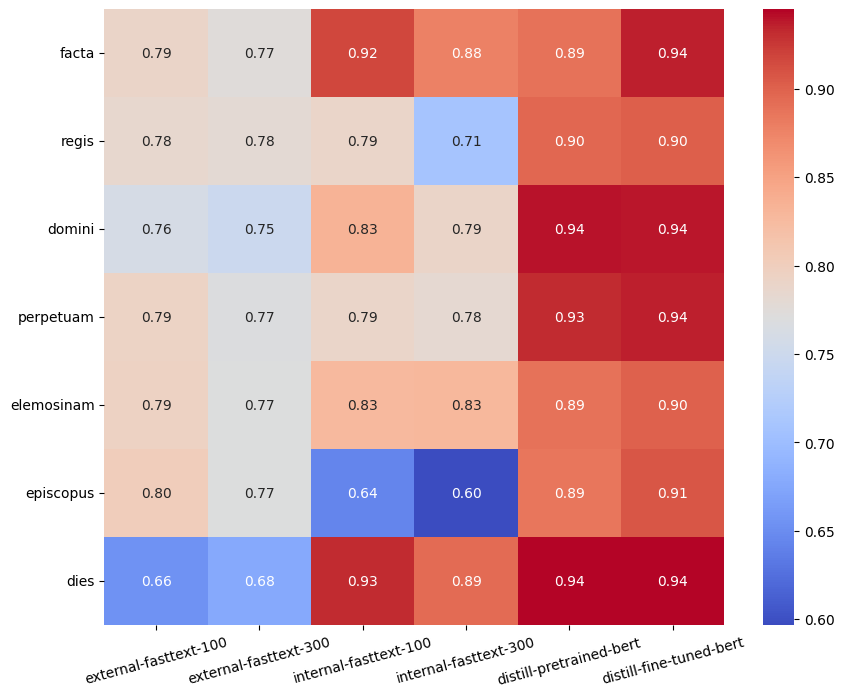

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

s = sns.heatmap(df_cosine_similarities, annot=True, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=15)
plt.yticks(rotation=0)

plt.show()